# Assessment Review

The topics covered will be:

1. Normal Distributions
2. Statistical Tests
3. Bayesian Statistics
4. Linear Regression

In [1]:
from src.call import call_on_students

## Part 1: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 1: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [4]:
call_on_students(3)

['Roshni' 'Jose' 'Ilan']


In [6]:
# Code here
z_eight = (8 - 6) / 2
z_eight

1.0

### Task 2: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [ ]:
# call_on_students(1)

In [7]:
import scipy.stats as stats

In [15]:
# Code here
over_eight = stats.norm(loc=6, scale=2).cdf(8)
print((1-over_eight)*100)


# or
stats.norm(6, 2).sf(abs(8))

15.865525393145708


0.15865525393145707

### Task 3: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [ ]:
# call_on_students(1)

In [39]:
import numpy as np

In [45]:
# Code here
sigma = .5
x_bar = 5
n = 7
s_e = sigma/(np.sqrt(n))

z_crit = stats.t.ppf(0.975, df=n-1)

left = x_bar - (z_crit * s_e)
right = x_bar + (z_crit * s_e)
left, right

(4.53757712628571, 5.46242287371429)

In [44]:
stats.t.interval(alpha = 0.95,          # Confidence level(alpha)
                 df= (n)-1,             # Degrees of freedom
                 loc = x_bar,           # Sample mean
                 scale = s_e)           # Standard deviation estimate

(4.53757712628571, 5.46242287371429)

### Task 4: Interpret the 95% Confidence Interval that you derived in the above question

In [ ]:
# call_on_students(1)

Interpret: 

- we are 95% confident that the mean of the students sleep is between 4.5 hours and 5.46 hours


## Part 2: Hypothesis Testing

Let's make some hypotheses about cars!

### Task 5: Set Up

In [ ]:
# call_on_students(1)

In [47]:
# Imports - need pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv('./data/auto-mpg.csv')

In [49]:
# Check the head of our data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [51]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [53]:
# Describe the data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


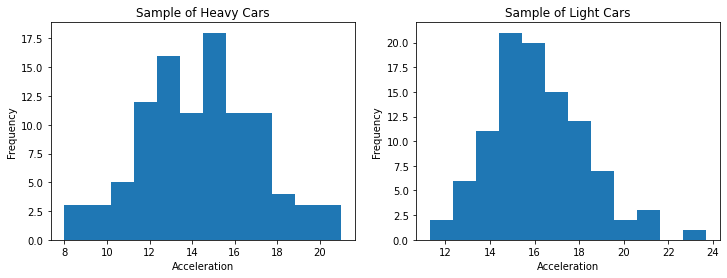

In [56]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate faster than heavy cars.

### Task 6: Set up the null and alternative hypotheses for this test

In [ ]:
# call_on_students(1)

**Null hypothesis:**

- Light cars are equal to or slower than heavy cars (<=)


**Alternative hypothesis:**

- Light cars accelerate faster than heavy cars. (>)


### Task 7: Describe your Type 1 and Type 2 errors in this context

In [ ]:
# call_on_students(1)

**Type I Error:**

- Falsly stating that light cars are faster than heavy cars. Falsly rejecting null


**Type II Error:**

- Falsly stating that light cars are slower or equal to heavy cars. Falsly fail to reject null




### Task 8: The Hypothesis Test!

### 8a: Describe the type of test:

In [ ]:
# call_on_students(1)

Description:

- two-sample t-test
- right one-tailed


### 8b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [ ]:
# call_on_students(1)

In [62]:
heavy_cars['acceleration'].var()/light_cars['acceleration'].var()

1.4630788498317422

In [63]:
# Code here
stats.ttest_ind(heavy_cars['acceleration'], light_cars['acceleration'], equal_var=True)

Ttest_indResult(statistic=-5.00874014469676, pvalue=1.2096440668168987e-06)

### 8c: Analyze your results: can you reject the null hypothesis?

In [ ]:
# call_on_students(1)

Can you reject the null hypothesis?

- Yes, we reject the null hypothesis because the p-value is less than .05 (alpha)
- Light cars are NOT equal to or slower than heavy cars


## Part 3: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

In [71]:
# P_a = prob democrat
# p_b = prob voted no
# p_a_given_b = prob democrat given voted no
# p_b_given_a = prob voted no given dem

p_a = .6
p_b_given_a = .75
p_b = (.6 * .75) + (.4 * .05)
p_b_given_a * p_a / p_b

0.9574468085106382

### Task 9: Calculate the probability

In [ ]:
# call_on_students(1)

**1. Which probability are we trying to find?**

   - 
   
    
**2. Based on that, what other pieces do we need?**

   - 
    
    
**3. Result?**

   - 
    

## Part 4: Simple Linear Regression

**BACK TO CARS**

### The Prompt:

> Car manufacturers have asked us to predict how many miles per gallon a car can run based on the other variables we have in the data we're given. 

Sounds like a regression problem! But first let's further explore the data.

### Task 10: Explore the Data Visually

In [67]:
import seaborn as sns

In [68]:
# call_on_students(1)

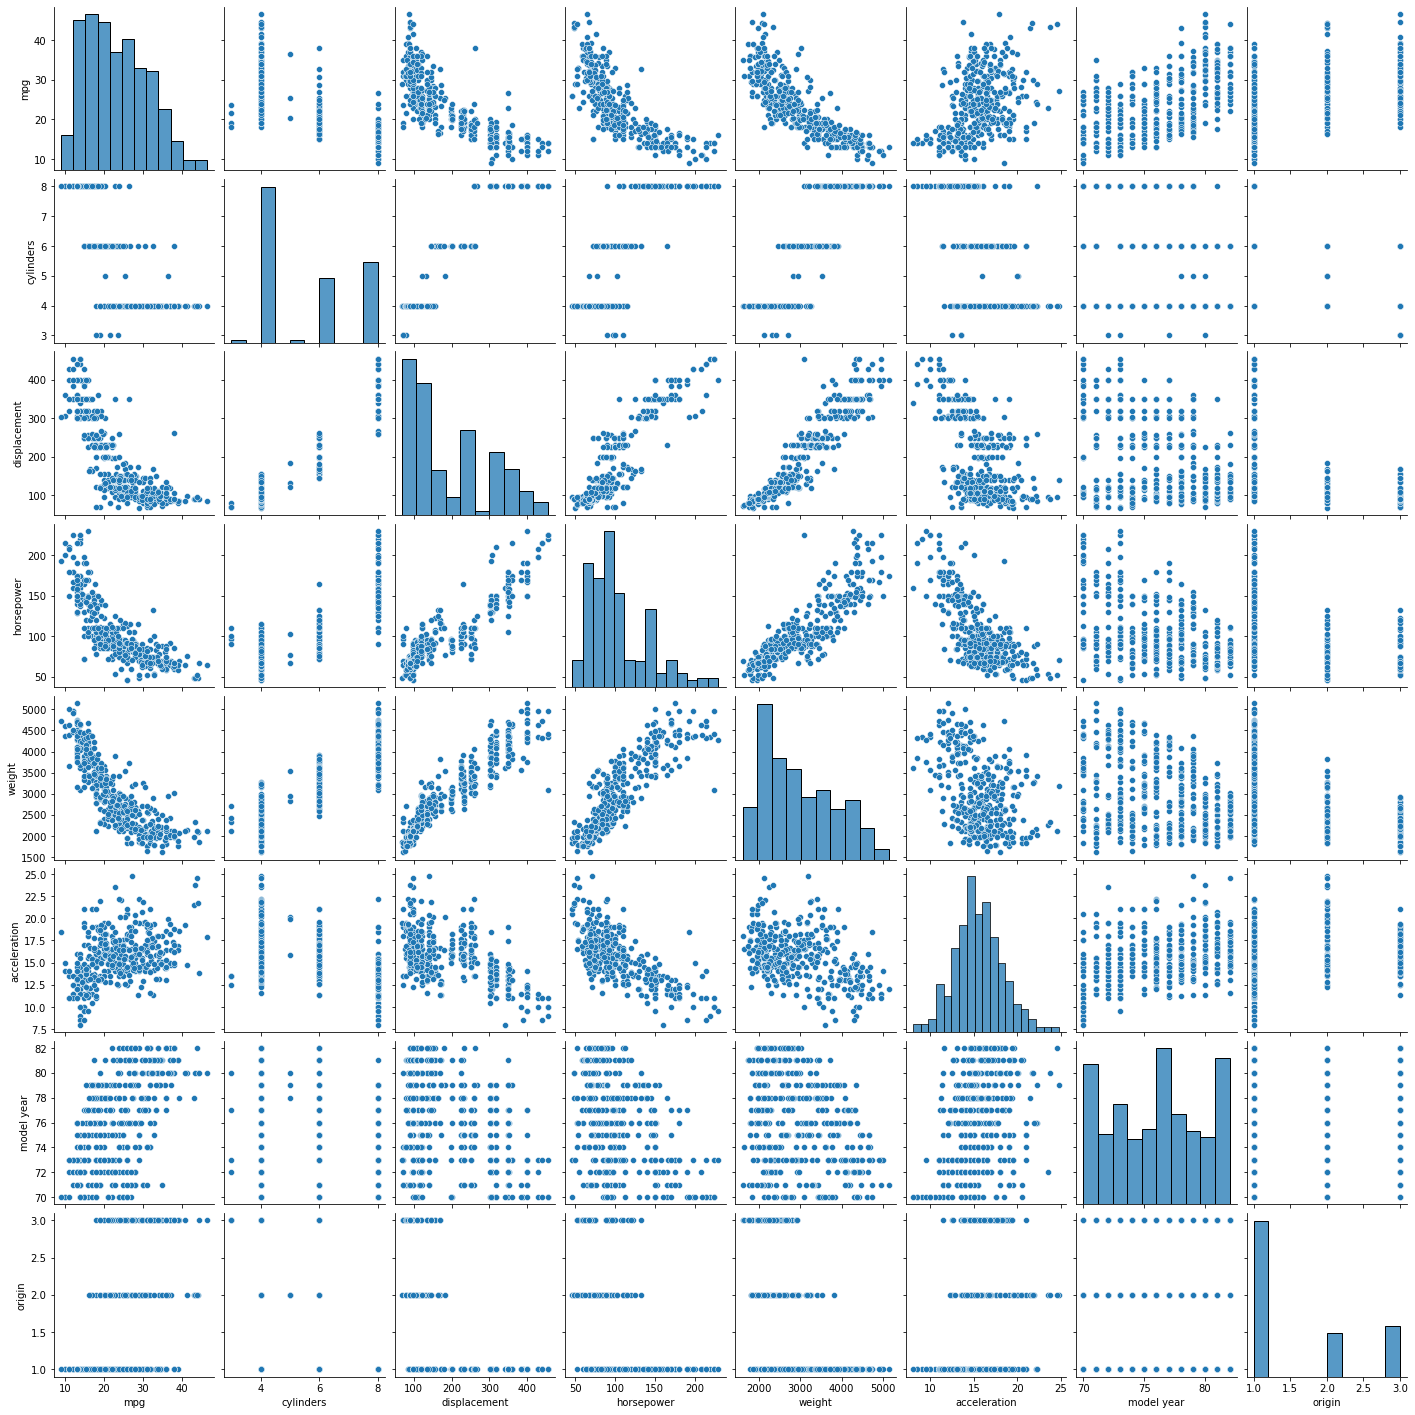

In [69]:
# Make a pairplot using seaborn to examine the relationships between variables
# Note - do this on the whole dataframe, not just independent variables
sns.pairplot(df)

<AxesSubplot:>

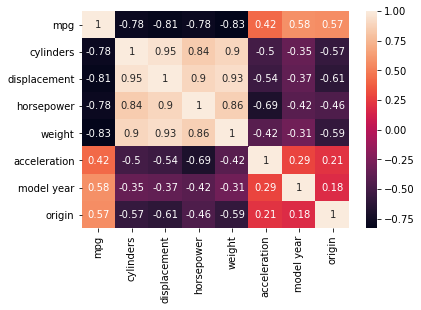

In [73]:
# Create a correlation heatmap as well, with seaborn plus the 'corr' function
sns.heatmap((df.corr()), annot=True)

### Task 11: Explore your variables

Look at both at the pairplot and the correlation heatmap - what are some trends you see? Any potential problems?

Here, we expect you to look at what kinds of data you have. You may also want to discuss how the data is distributed. Analyze both the relationships between independent variables and the relationships between independent variables and your target/dependent variable (miles per gallon).

In [ ]:
# call_on_students(1)

**Observations:**

- Cylinders, displacement, horsepower, and weight all have a strong negative correlation with miles per gallon
- Could be multicollinearity between all four of those since they are all highly correlated

- mix of numerical and categorical data
- the target is likely non-normal given the chart



### Task 12: Pick one X variable and model

Pick the variable you think would be best to use to predict MPG, and create, fit and summarize the output of a statsmodels OLS model!

Set the summary output equal to `simple_model_summary`

In [74]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# call_on_students(1)

In [75]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X!
y = df['mpg']
X = df[['weight']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

In [76]:
simple_model_summary = results.summary()

In [77]:
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          6.02e-102
Time:                        17:42:19   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 13: Interpret!

In [ ]:
# call_on_students(1)

There are many things you could observe from this output, but I want especially for you to make an inference about the relationship between the X variable and MPG.

- 69.3% of our variance is described by the model
- const and weight are both statistically sig

- if the weight of the car were zero, we would expect the mpg to be 46.2
- for every increase in 1 lbs, we would see an MPG reduction by .0076 mpg


### Task 14: Model with all numeric X variables

Create, fit and summarize the output of a statsmodels OLS model that has all of the possible X variables in our dataset!

Set the summary output equal to `model_summary`

In [78]:
# Want to use 'cylinders', 'displacement', 'horsepower', 'weight' and 'acceleration'
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# call_on_students(1)

In [86]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X! 
y = df['mpg']
X = df.drop((['mpg', 'model year', 'origin', 'car name', 'cylinders']), axis=1)

In [87]:
model = sm.OLS(y, sm.add_constant(X)).fit()

In [88]:
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          9.63e-102
Time:                        17:54:04   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.2511      2.456     18.424      0.000      40.422      50.080
displacement    -0.0060      0.007     -0.894      0.372      -0.019       0.007
horsepower      -0.0436      0.017     -2.631      0.009      -0.076      -0.011
weight          -0.0053      0.001     -6.512      0.000      -0.007      -0.004
acceleration    -0.0231      0.126     -0.184      0.854      -0.270       0.224
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 15: Interpret!


In [ ]:
# call_on_students(1)

Specifically, compare this model summary to your simple model's summary.

- The multi-linear model describes about 70% of the variance
- displacement and acceleration are not stat significant


- log target
- scale/standardize features
- multicolinearity
- curve the line

In [89]:
# log the target
y_log = np.log(df.mpg)

In [97]:
# Standardize the features
X_standardized = X.copy()
for col in X.columns:
    X_standardized[col] = (X_standardized[col] - X_standardized[col].mean())/X_standardized[col].std()

In [98]:
X.describe()

,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000
mean,194.411990,104.469388,2977.584184,15.541327
std,104.644004,38.491160,849.402560,2.758864
min,68.000000,46.000000,1613.000000,8.000000
25%,105.000000,75.000000,2225.250000,13.775000
50%,151.000000,93.500000,2803.500000,15.500000
75%,275.750000,126.000000,3614.750000,17.025000
max,455.000000,230.000000,5140.000000,24.800000


In [100]:
X_standardized.describe()

,displacement,horsepower,weight,acceleration
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-5.437827e-17,-1.631348e-16,3.625218e-17,4.350262e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.208019e+00,-1.519034e+00,-1.606522e+00,-2.733490e+00
25%,-8.544397e-01,-7.656144e-01,-8.857216e-01,-6.402369e-01
50%,-4.148541e-01,-2.849846e-01,-2.049490e-01,-1.497955e-02
75%,7.772830e-01,5.593651e-01,7.501341e-01,5.377842e-01
max,2.490234e+00,3.261284e+00,2.545808e+00,3.355973e+00


In [103]:
X_standardized['d^2'] = X_standardized['displacement'] **2

In [104]:
model = sm.OLS(y, sm.add_constant(X_standardized)).fit()

In [105]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     228.5
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          5.82e-113
Time:                        18:09:17   Log-Likelihood:                -1091.4
No. Observations:                 392   AIC:                             2195.
Df Residuals:                     386   BIC:                             2219.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           21.2875      0.339     62.768      0.000      20.621      21.954
displacement    -2.4689      0.693     -3.561      0.000      -3.832      -1.106
horsepower      -3.8200      0.652     -5.855      0.000      -5.103      -2.537
weight          -2.2638      0.700     -3.235      0.001      -3.640      -0.888
acceleration    -0.3934      0.325     -1.211      0.227      -1.032       0.245
d^2              2.1640      0.275      7.868      0.000       1.623       2.705
==============================================================================
Omnibus:                       39.718   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.267
Skew:                           0.627   Prob(JB):                     1.50e-15
Kurtosis:                       4.615   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

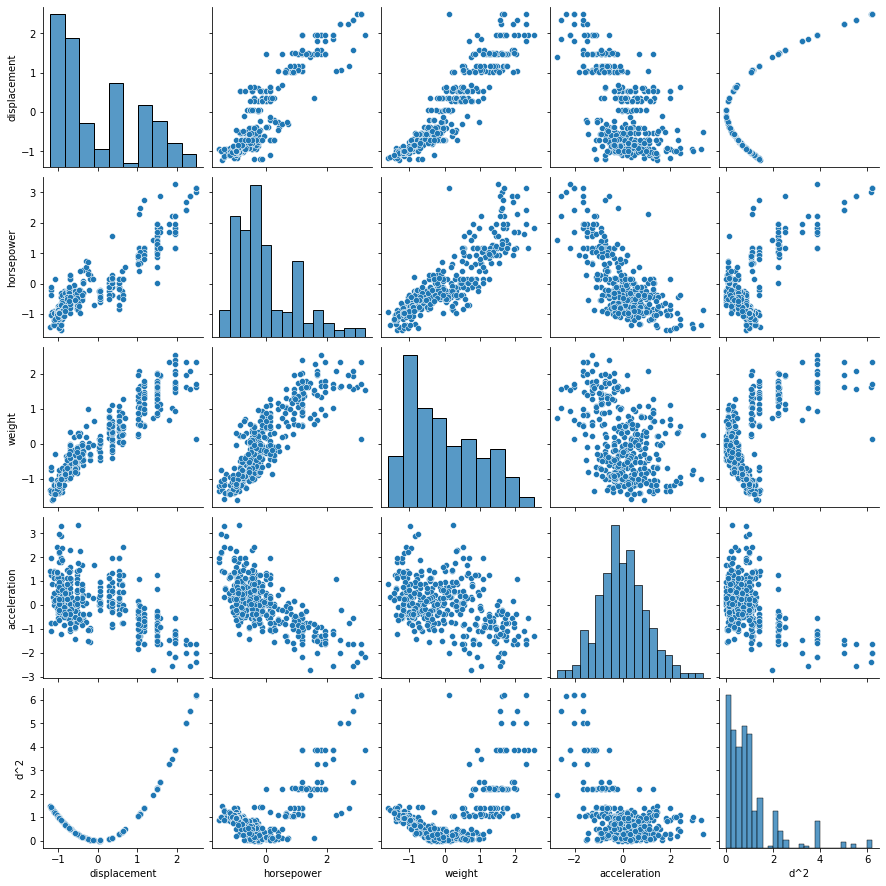

In [106]:
sns.pairplot(X_standardized)